In [19]:
import geopandas as gpd
import pandas as pd
from geetiles import cmds
import numpy as np
import matplotlib.pyplot as plt

In [7]:
mfile = '/opt/data/california-naip-chips/california-naip-chips-100k.parquet'

In [8]:
data = gpd.read_parquet(mfile)

In [9]:
data.head()

,onehot_count,onehot_area,onehot_length,string_labels,date,chip_index_x,chip_index_y,cloud_cover_percentage,nodata_percentage,geometry,embeddings,original_chip_id
chip_id,,,,,,,,,,,,
2aa6edd542c04,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[highway=*, highway=residential, landuse=*, la...",2022-05-01,11,19,0.0,0.0,"POLYGON ((-117.35728 34.53802, -117.35728 34.5...","[-0.18207408, 0.010965488, 0.14534824, 0.01129...",ca_m_3411730_sw_11_060_20220501-11-19
263c35b6bc2de,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[highway=*, highway=track, natural=*, natural=...",2022-05-01,18,27,0.0,0.0,"POLYGON ((-117.34552 34.52698, -117.34551 34.5...","[-0.12799226, 0.016031748, 0.14097819, -0.0078...",ca_m_3411730_sw_11_060_20220501-18-27
03727d6e08a60,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[highway=*, highway=residential]",2022-05-01,26,32,0.0,0.0,"POLYGON ((-117.33210 34.52009, -117.33210 34.5...","[-0.17556956, 0.027415793, 0.1394226, 0.014260...",ca_m_3411730_sw_11_060_20220501-26-32
15feffc8237b1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[building=*, building=house, highway=*, highwa...",2022-05-01,34,15,0.0,0.0,"POLYGON ((-117.31880 34.54367, -117.31880 34.5...","[-0.15264373, 0.02538409, 0.16069295, 0.021494...",ca_m_3411730_sw_11_060_20220501-34-15
3507df52f7a00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[highway=*, highway=residential]",2022-05-01,39,15,0.0,0.0,"POLYGON ((-117.31043 34.54369, -117.31043 34.5...","[-0.15472408, 0.021862868, 0.15023148, 0.01503...",ca_m_3411730_sw_11_060_20220501-39-15


In [10]:
# prepare for geetiles

tmpdata = data[['geometry']].copy()
tmpdata['identifier'] = tmpdata.index
tmpdata.to_file("/tmp/data.geojson", driver='GeoJSON')

## call geetiles to make the split

In [11]:
cmds.split(tiles_file = '/tmp/data.geojson',
                nbands = 80,
                angle = -np.pi/4,
                train_pct = 0.7,
                test_pct = 0.15,
                val_pct = 0.15)

saved to /tmp/data.geojson
all splits saved to /tmp/data_splits.csv


In [12]:
splits = pd.read_csv("/tmp/data_splits.csv").set_index('identifier')
splits.index.name = 'chip_id'
splits.shape

(104240, 1)

In [13]:
data.head()

,onehot_count,onehot_area,onehot_length,string_labels,date,chip_index_x,chip_index_y,cloud_cover_percentage,nodata_percentage,geometry,embeddings,original_chip_id
chip_id,,,,,,,,,,,,
2aa6edd542c04,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[highway=*, highway=residential, landuse=*, la...",2022-05-01,11,19,0.0,0.0,"POLYGON ((-117.35728 34.53802, -117.35728 34.5...","[-0.18207408, 0.010965488, 0.14534824, 0.01129...",ca_m_3411730_sw_11_060_20220501-11-19
263c35b6bc2de,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[highway=*, highway=track, natural=*, natural=...",2022-05-01,18,27,0.0,0.0,"POLYGON ((-117.34552 34.52698, -117.34551 34.5...","[-0.12799226, 0.016031748, 0.14097819, -0.0078...",ca_m_3411730_sw_11_060_20220501-18-27
03727d6e08a60,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[highway=*, highway=residential]",2022-05-01,26,32,0.0,0.0,"POLYGON ((-117.33210 34.52009, -117.33210 34.5...","[-0.17556956, 0.027415793, 0.1394226, 0.014260...",ca_m_3411730_sw_11_060_20220501-26-32
15feffc8237b1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[building=*, building=house, highway=*, highwa...",2022-05-01,34,15,0.0,0.0,"POLYGON ((-117.31880 34.54367, -117.31880 34.5...","[-0.15264373, 0.02538409, 0.16069295, 0.021494...",ca_m_3411730_sw_11_060_20220501-34-15
3507df52f7a00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[highway=*, highway=residential]",2022-05-01,39,15,0.0,0.0,"POLYGON ((-117.31043 34.54369, -117.31043 34.5...","[-0.15472408, 0.021862868, 0.15023148, 0.01503...",ca_m_3411730_sw_11_060_20220501-39-15


## join and save

In [14]:
sdata = data.join(splits)
sdata.to_parquet(mfile)

In [15]:
sdata.head()

,onehot_count,onehot_area,onehot_length,string_labels,date,chip_index_x,chip_index_y,cloud_cover_percentage,nodata_percentage,geometry,embeddings,original_chip_id,split
chip_id,,,,,,,,,,,,,
2aa6edd542c04,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[highway=*, highway=residential, landuse=*, la...",2022-05-01,11,19,0.0,0.0,"POLYGON ((-117.35728 34.53802, -117.35728 34.5...","[-0.18207408, 0.010965488, 0.14534824, 0.01129...",ca_m_3411730_sw_11_060_20220501-11-19,train
263c35b6bc2de,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[highway=*, highway=track, natural=*, natural=...",2022-05-01,18,27,0.0,0.0,"POLYGON ((-117.34552 34.52698, -117.34551 34.5...","[-0.12799226, 0.016031748, 0.14097819, -0.0078...",ca_m_3411730_sw_11_060_20220501-18-27,train
03727d6e08a60,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[highway=*, highway=residential]",2022-05-01,26,32,0.0,0.0,"POLYGON ((-117.33210 34.52009, -117.33210 34.5...","[-0.17556956, 0.027415793, 0.1394226, 0.014260...",ca_m_3411730_sw_11_060_20220501-26-32,train
15feffc8237b1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[building=*, building=house, highway=*, highwa...",2022-05-01,34,15,0.0,0.0,"POLYGON ((-117.31880 34.54367, -117.31880 34.5...","[-0.15264373, 0.02538409, 0.16069295, 0.021494...",ca_m_3411730_sw_11_060_20220501-34-15,train
3507df52f7a00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[highway=*, highway=residential]",2022-05-01,39,15,0.0,0.0,"POLYGON ((-117.31043 34.54369, -117.31043 34.5...","[-0.15472408, 0.021862868, 0.15023148, 0.01503...",ca_m_3411730_sw_11_060_20220501-39-15,train


In [20]:
import geoplot as gplt

z = sdata.copy()
z['geometry'] = [i.centroid for i in z.geometry]

Text(0.5, 1.0, 'train - test - val split')

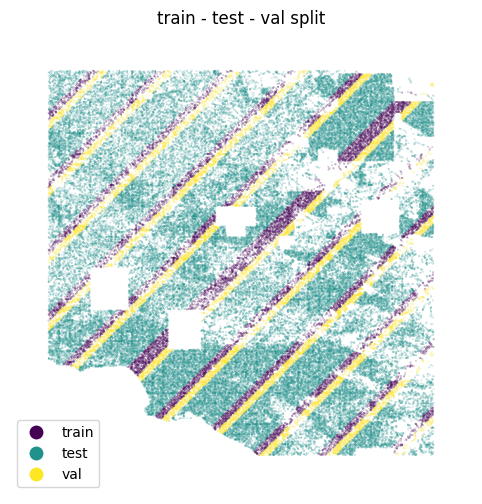

In [21]:
gplt.pointplot(z, hue='split', s=0.1, legend=True, legend_labels=['train', 'test', 'val']);
plt.title(f"train - test - val split")
